# Read and explore data

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot
import seaborn as sns

### Read Data

In [2]:
applications_data = pd.read_csv('../data/BPI_Challenge_2017.csv')

In [3]:
applications_data.columns.values

array(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name',
       'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms',
       'Accepted', 'MonthlyCost', 'Selected', 'CreditScore',
       'OfferedAmount', 'OfferID'], dtype=object)

#### Fix column names 

In [4]:
fix_cols_names = lambda x: re.sub( '(?<!^)(?=[A-Z])', '_', x.replace('ID','Id')).lower().replace(':','_').replace('__','_')
fixed_app_cols = [fix_cols_names(col) for col in applications_data.columns]
fixed_app_cols

['action',
 'org_resource',
 'concept_name',
 'event_origin',
 'event_id',
 'lifecycle_transition',
 'time_timestamp',
 'case_loan_goal',
 'case_application_type',
 'case_concept_name',
 'case_requested_amount',
 'first_withdrawal_amount',
 'number_of_terms',
 'accepted',
 'monthly_cost',
 'selected',
 'credit_score',
 'offered_amount',
 'offer_id']

In [5]:
applications_data.columns = fixed_app_cols

In [6]:
applications_data.head()

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,case_requested_amount,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
applications_data.dtypes

action                      object
org_resource                object
concept_name                object
event_origin                object
event_id                    object
lifecycle_transition        object
time_timestamp              object
case_loan_goal              object
case_application_type       object
case_concept_name           object
case_requested_amount      float64
first_withdrawal_amount    float64
number_of_terms            float64
accepted                    object
monthly_cost               float64
selected                    object
credit_score               float64
offered_amount             float64
offer_id                    object
dtype: object

### Structure data by year-week

In [8]:
applications_data['datetime'] = pd.to_datetime(applications_data.time_timestamp)
applications_data['week'] = applications_data['datetime'].dt.strftime('%G%V')

In [9]:
applications_data

,action,org_resource,concept_name,event_origin,event_id,lifecycle_transition,time_timestamp,case_loan_goal,case_application_type,case_concept_name,...,first_withdrawal_amount,number_of_terms,accepted,monthly_cost,selected,credit_score,offered_amount,offer_id,datetime,week
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.304000+00:00,201553
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.352000+00:00,201553
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:51:15.774000+00:00,201553
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.392000+00:00,201553
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 09:52:36.403000+00:00,201553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06 06:33:02.212000+00:00,201701
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-06 06:33:02.221000+00:00,201701
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-16 09:51:21.114000+00:00,201703
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144,2017-01-16 09:51:21.139000+00:00,201703


### Explore Data per Week

#### What is the number of events per week? 

In [10]:
events_per_week = applications_data.week.value_counts().reset_index() \
                    .rename(index = str, columns = {'index':'week',
                                                    'week':'num_events'}) \
                    .sort_values('week') 
events_per_week

,week,num_events
56,201553,887
52,201601,9905
50,201602,15405
49,201603,16855
43,201604,18487
35,201605,20782
42,201606,19531
33,201607,21234
31,201608,22072
25,201609,23632


In [11]:
events_per_week.dtypes

week          object
num_events     int64
dtype: object

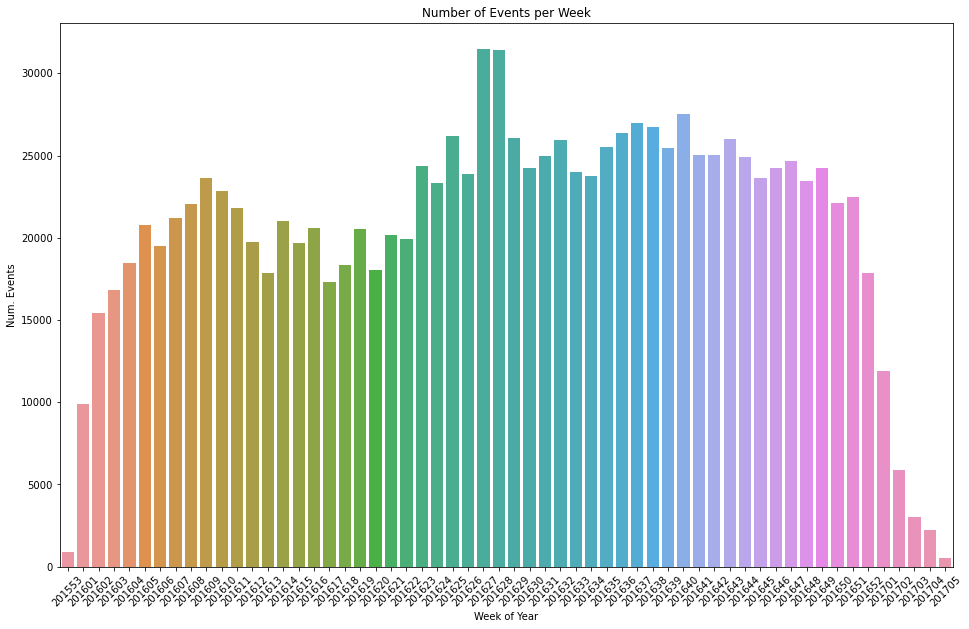

In [12]:
fig, ax = pyplot.subplots(figsize=(16,10))
g = sns.barplot(data = events_per_week, x ='week', y= 'num_events');
g.set_xlabel('Week of Year')
g.set_ylabel('Num. Events')
g.set_title('Number of Events per Week')
pyplot.xticks(rotation=45);

#### What is the total applications requested amount per week?

In [13]:
apps_pending_per_week = applications_data[applications_data['concept_name'].isin(['A_Pending'])].groupby(['week','case_concept_name']).case_requested_amount.sum().reset_index()
apps_pending_per_week

,week,case_concept_name,case_requested_amount
0,201601,Application_1059184025,6600.0
1,201601,Application_1096831814,11800.0
2,201601,Application_1674281629,30000.0
3,201601,Application_1786874274,0.0
4,201602,Application_1014824736,10000.0
...,...,...,...
17223,201705,Application_637658579,10000.0
17224,201705,Application_654932562,29000.0
17225,201705,Application_702998309,32000.0
17226,201705,Application_817508008,43000.0


In [14]:
req_amt_per_week = apps_pending_per_week.groupby(['week']).case_requested_amount.sum().reset_index()
req_amt_per_week

,week,case_requested_amount
0,201601,48400.00
1,201602,1767400.00
2,201603,3735550.00
3,201604,2975161.00
4,201605,3820682.00
5,201606,3398175.00
6,201607,3358200.00
7,201608,6870489.00
8,201609,4207850.00
9,201610,4291985.00


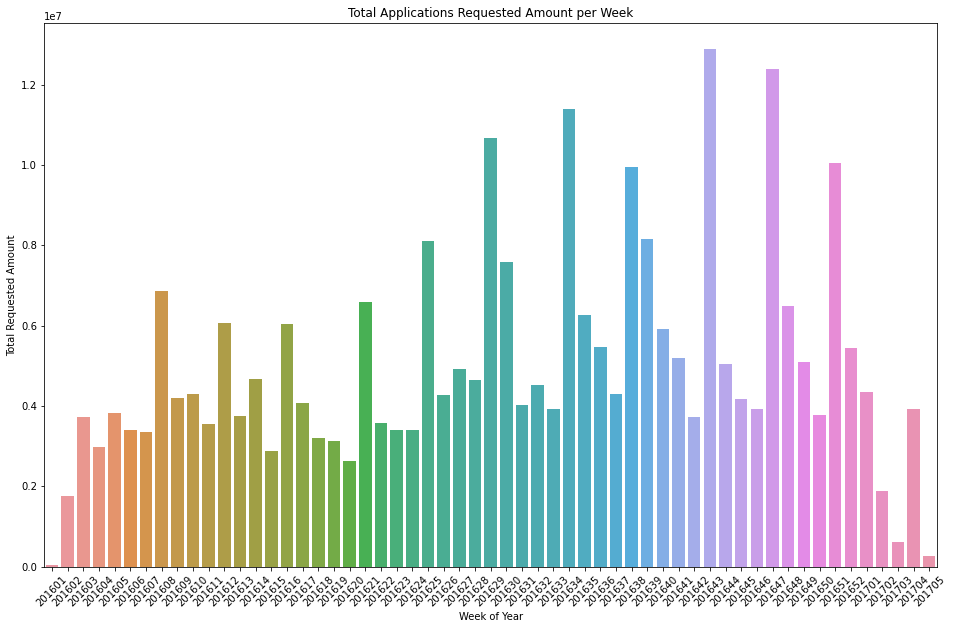

In [15]:
fig, ax = pyplot.subplots(figsize=(16,10))
g = sns.barplot(ax = ax, x='week', y='case_requested_amount', data = req_amt_per_week)
g.set_xlabel('Week of Year')
g.set_ylabel('Total Requested Amount')
g.set_title('Total Applications Requested Amount per Week')
pyplot.xticks(rotation=45);

In [16]:
apps_offers = applications_data[applications_data['concept_name'] == 'O_Create Offer'] \
    .filter(['case_concept_name','event_id','offered_amount']) \
    .rename(index=str, columns={'case_concept_name':'app_id',
                                'event_id':'offer_id'})
apps_offers

,app_id,offer_id,offered_amount
9,Application_652823628,Offer_148581083,20000.0
50,Application_1691306052,Offer_1669071500,6000.0
79,Application_428409768,Offer_1209840642,15000.0
87,Application_428409768,Offer_997411923,15000.0
135,Application_1746793196,Offer_1319158006,15700.0
...,...,...,...
1202122,Application_2103458006,Offer_682062790,15000.0
1202124,Application_2103458006,Offer_1395096354,15000.0
1202148,Application_59622033,Offer_1445809476,10000.0
1202202,Application_303923658,Offer_1734870628,30000.0


#### What is the total offered amount for succeeded applications per week?

In [17]:
succ_apps_week = applications_data[applications_data['concept_name'] == 'A_Pending'] \
    .filter(['case_concept_name','week']) \
    .rename(index=str, columns={'case_concept_name':'app_id',
                                'week':'deal_closed_week'})

succ_apps_week

,app_id,deal_closed_week
38,Application_652823628,201602
114,Application_428409768,201602
197,Application_1746793196,201604
363,Application_619403287,201603
428,Application_1529124572,201604
...,...,...
1202031,Application_965278193,201702
1202066,Application_1331346987,201704
1202111,Application_1107993134,201704
1202191,Application_59622033,201704


In [18]:
applications_data[applications_data['concept_name'] == 'O_Accepted'].groupby('case_concept_name').offer_id.count().describe()

count    17228.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: offer_id, dtype: float64

As we can see in the above statistics, there is at most one accepted offer per application. Thus, we don't need to worry of multiple offers which were accepted and then discarded.

In [19]:
#Finding Successful Applications accepted offers
apps_acc_offers = applications_data[applications_data['concept_name'] == 'O_Accepted'] \
    .filter(['case_concept_name','offer_id']) \
    .rename(index=str, columns={'case_concept_name':'app_id'})

apps_acc_offers

,app_id,offer_id
37,Application_652823628,Offer_148581083
113,Application_428409768,Offer_997411923
196,Application_1746793196,Offer_774210695
362,Application_619403287,Offer_1534843733
427,Application_1529124572,Offer_1217920740
...,...,...
1202030,Application_965278193,Offer_1880706415
1202065,Application_1331346987,Offer_1103493515
1202110,Application_1107993134,Offer_1811761338
1202190,Application_59622033,Offer_1445809476


In [20]:
# Building Successful Applications offers dataset with offers and closing week metadata
succ_apps_offers = pd.merge(pd.merge(apps_acc_offers, apps_offers, how='inner'), succ_apps_week, how='inner')
succ_apps_offers

,app_id,offer_id,offered_amount,deal_closed_week
0,Application_652823628,Offer_148581083,20000.0,201602
1,Application_428409768,Offer_997411923,15000.0,201602
2,Application_1746793196,Offer_774210695,15700.0,201604
3,Application_619403287,Offer_1534843733,15000.0,201603
4,Application_1529124572,Offer_1217920740,5000.0,201604
...,...,...,...,...
17223,Application_965278193,Offer_1880706415,16000.0,201702
17224,Application_1331346987,Offer_1103493515,12500.0,201704
17225,Application_1107993134,Offer_1811761338,5000.0,201704
17226,Application_59622033,Offer_1445809476,10000.0,201704


In [21]:
# Computes the total offered amount of applications closed per week
succ_apps_offers_per_week = succ_apps_offers.groupby('deal_closed_week').offered_amount.sum().reset_index() \
                                .rename(index=str, columns={'offered_amount':'total_offered_amount'}) \
                                .assign(deal_closed_week = lambda x: x.deal_closed_week.astype(str))
succ_apps_offers_per_week

,deal_closed_week,total_offered_amount
0,201601,66800.00
1,201602,2092550.00
2,201603,4146100.00
3,201604,3508050.00
4,201605,4017600.00
5,201606,3814550.00
6,201607,3599900.00
7,201608,7880650.00
8,201609,4852350.00
9,201610,4723550.00


In [22]:
succ_apps_offers_per_week.dtypes

deal_closed_week         object
total_offered_amount    float64
dtype: object

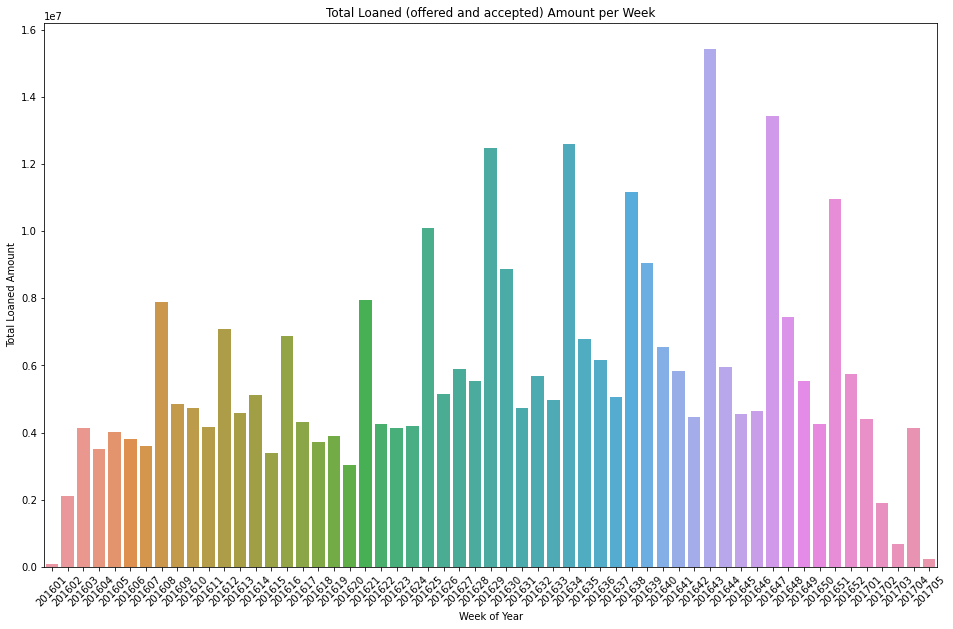

In [23]:
fig, ax = pyplot.subplots(figsize=(16,10))
g = sns.barplot(ax = ax, x='deal_closed_week', y='total_offered_amount', data = succ_apps_offers_per_week)
g.set_xlabel('Week of Year')
g.set_ylabel('Total Loaned Amount')
g.set_title('Total Loaned (offered and accepted) Amount per Week')
pyplot.xticks(rotation=45);

There seems to be a pattern, where the total amount of successful loans is usually low with a  at every 4-5 weeks, there is a spike in the total amount of successful loans. Thus data seems suitable for prediction.